<a href="https://colab.research.google.com/github/vikxoxo/NLP/blob/master/text_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Notebook 2: Analyse the pickled dataframe produced in Notebook 1

1.       Analyze the text to come up with some interesting insights using NLP techniques

2.       Create some interesting visualization of your findings

## Import and Install

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns
from collections import  Counter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8076594bdaedc8163a00f2a8bb9d132789a7aff50f0e5b09996ccc2b45763dc7
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=493c3f6b0398eda1fa08685ec440f7b733a528d75276ef210a01c65c34df8b2b
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.7 MB/s eta 0:00:00


In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.7 MB/s eta 0:00:00


## Reading Task 1 Data

In [ ]:
#reading no sent intermediate dataset
#reading the intermediate created csv having rest of the required columns
folder_path = '/content/drive/MyDrive/hsbc_assignment/'
file_name = 'task1_nosent.csv'

In [ ]:
df_nosent = pd.read_csv(folder_path+file_name)

In [ ]:
file_name = 'task1_110speech.pkl'
df_sent110 = pd.read_pickle(folder_path+file_name)

In [ ]:
df_nosent.sample(5)

,Unnamed: 0,date,speakers,title,subtitle,contents,lang,en_subtitle,en_title,Type of speech,Type of speech 2,Role of speaker,Role of speaker 2,Occasion,Occasion 2,Occasion Place,Occasion Place 2
2582,2582,1999-01-25,Sirkka Hämäläinen,Finnish savers and investors in the euro area,"Speech presented by Ms Sirkka Hämäläinen, Memb...",Finnish savers and investors in the euro are...,en,"Speech presented by Ms Sirkka Hämäläinen, Memb...",Finnish savers and investors in the euro area,Speech,From saving to investing - new forms of asset ...,Member of the Executive Board of the European ...,Member of the Executive Board of the European ...,From saving to investing - new forms of asset ...,From saving to investing - new forms of asset ...,Helsinki,Helsinki
11,11,2022-11-14,Luis de Guindos,Outlook for the euro area economy and financia...,"Speech by Luis de Guindos, Vice-President of t...",SPEECH Outlook for the euro area economy a...,en,"Speech by Luis de Guindos, Vice-President of t...",Outlook for the euro area economy and financia...,Speech,25th Frankfurt Euro Finance Week,Vice-President of the ECB,Vice-President of the ECB,25th Frankfurt Euro Finance Week,25th Frankfurt Euro Finance Week,ECB,Frankfurt Euro Finance Week
1951,1951,2006-06-29,Jean-Claude Trichet,Further integrating euro area economies: some ...,"Speech by Jean-Claude Trichet, President of th...",Further integrating euro area economies: som...,de,"Speech by Jean-Claude Trichet, President of th...",Further integrating euro area economies: some ...,Speech,"Speech by Jean-Claude Trichet, President of th...",President of the ECB,President of the ECB,ECB 57th Annual Meeting of the Ifo Institute f...,ECB 57th Annual Meeting,University of Munich Munich,University of Munich Munich
373,373,2019-04-06,Yves Mersch,Competitiveness of Europe and European Financi...,"Panel contribution by Yves Mersch, Member of t...",Competitiveness of Europe and European Finan...,en,"Panel contribution by Yves Mersch, Member of t...",Competitiveness of Europe and European Financi...,Panel contribution,Panel contribution,Member of the Executive Board of the ECB,Member of the Executive Board of the ECB,The Outlook for the Economy and Finance confer...,The Outlook for the Economy and Finance confer...,Cernobbio,Cernobbio
190,190,2021-02-22,Christine Lagarde,"Investing in our climate, social and economic ...","Speech by Christine Lagarde, President of the ...","SPEECH Investing in our climate, social an...",en,"Speech by Christine Lagarde, President of the ...","Investing in our climate, social and economic ...",virtual format,opening plenary session of the European Parlia...,President of the ECB,President of the ECB,European Parliamentary Week 2021,European Parliamentary Week 2021,virtual format,European Parliamentary Week 2021


In [ ]:
df_nosent['contents'] = df_nosent.apply(lambda x: str(x['contents']), axis=1)

In [ ]:
df_sent110.rename(columns = {'Unnamed: 0':'Speech ID'}, inplace = True)

In [ ]:
df_sent110.head(5)

,Speech ID,date,speakers,title,subtitle,lang,en_subtitle,en_title,Type of speech,Type of speech 2,Role of speaker,Role of speaker 2,Occasion,Occasion 2,Occasion Place,Occasion Place 2,SentenceText,en_SentenceText,SentenceID
0,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,President of the ECB and Chair of the European...,President of the ECB and Chair of the European...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",SPEECH Macroprudential policy in Europe: bu...,SPEECH Macroprudential policy in Europe: buil...,0
1,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,President of the ECB and Chair of the European...,President of the ECB and Chair of the European...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",[1] When future historians look back on our t...,[1] When future historians look back on our t...,1
2,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,President of the ECB and Chair of the European...,President of the ECB and Chair of the European...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...","An array of powerful shocks – the pandemic, R...","An array of powerful shocks – the pandemic, R...",2
3,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,President of the ECB and Chair of the European...,President of the ECB and Chair of the European...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",This unstable environment poses sizeable risks...,This unstable environment poses sizeable risks...,3
4,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,President of the ECB and Chair of the European...,President of the ECB and Chair of the European...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",And those risks are further heightened by a we...,And those risks are further heightened by a we...,4


# Different Insights/Analytics and Visualizations

let's see the number of characters present in each speech. 
This can give us a rough idea about the speech length.

In [ ]:
speech_id = 10

### Lang Plot

In [ ]:
df_nosent['lang'].value_counts()

en    2459
de     114
es      42
fr      24
it       7
nl       2
tl       1
lt       1
ca       1
af       1
Name: lang, dtype: int64

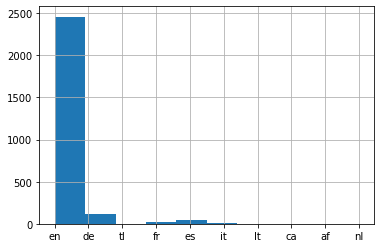

In [ ]:
df_nosent['lang'].hist()

### Char Len Analysis

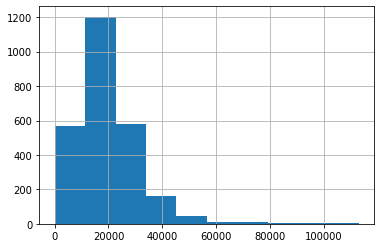

In [ ]:
#indicates that most speeches has around 15k to 30k characters
df_nosent['contents'].str.len().hist()

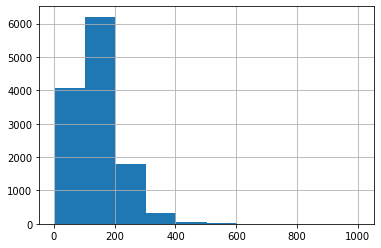

In [ ]:
#indicates that most sentences has around 150 to 250 characters
df_sent110['en_SentenceText'].str.len().hist()

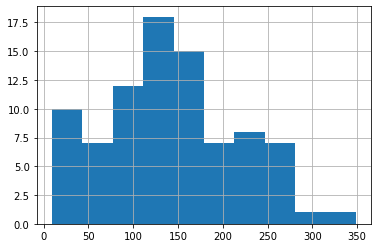

In [ ]:
#for a particular speech also this sent char length can also be analyzed 

df_sent110[df_sent110['Speech ID']== speech_id]['en_SentenceText'].str.len().hist()

### Words Count Analysis In Sent

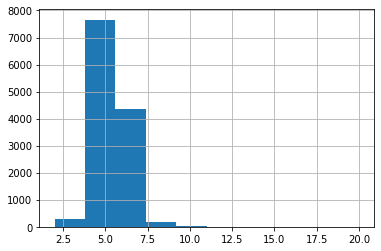

In [ ]:
# it indicates that all of the sentences has word counts in between 3 to 8 mostly. 
df_sent110['en_SentenceText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

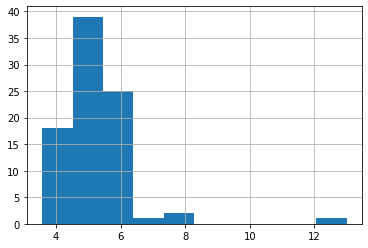

In [ ]:
# it indicates that all of the sentences has word counts in between 3 to 8 mostly. 
# word counts can be seen for any of the speech id too
df_sent110[df_sent110['Speech ID']== speech_id]['en_SentenceText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### Stop & Non-stop Words Analysis

In [ ]:
stop=set(stopwords.words('english'))

In [ ]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word.lower() not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

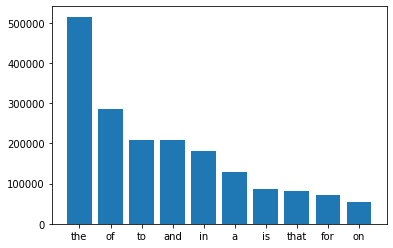

In [ ]:
"""
plotting the stop words for contents column in original data
"""
plot_top_stopwords_barchart(df_nosent['contents'])

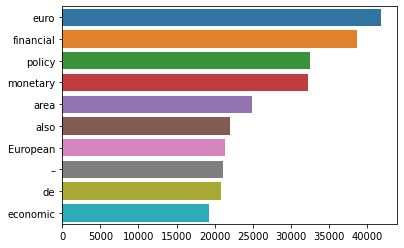

In [ ]:
"""
plotting the non-stop words for contents column in original data
"""
plot_top_non_stopwords_barchart(df_nosent['contents'])

### n-grams analysis

In [ ]:
stop=set(stopwords.words('english'))

In [ ]:
def plot_top_ngrams_barchart(text, n=2, stop_words=None):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(stop_words=stop_words, ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

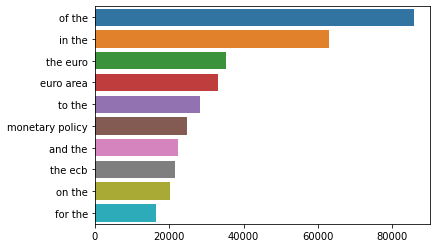

In [ ]:
"""
bi-gram of all speeches
"""
plot_top_ngrams_barchart(df_nosent['contents'],2)

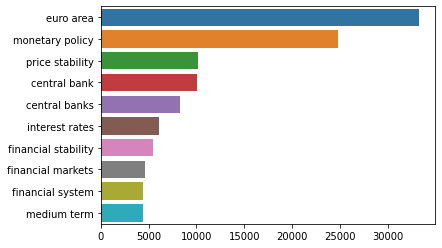

In [ ]:
"""
bi-gram of all speeches without stop words
"""
plot_top_ngrams_barchart(df_nosent['contents'],2, stop)

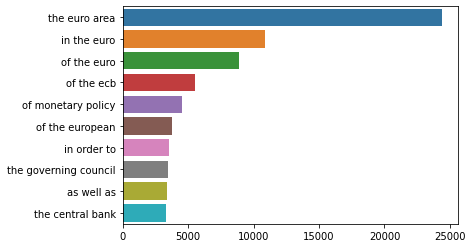

In [ ]:
"""
tri-gram of all speeches
"""
plot_top_ngrams_barchart(df_nosent['contents'],3)

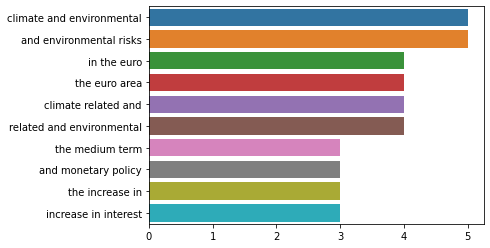

In [ ]:
"""
tri-gram of a particular speech 
speech-id is the row index of the original data
"""
#indicates that speech talks about enviornment, and moentary policy ... etc.
plot_top_ngrams_barchart(df_sent110[df_sent110['Speech ID']== speech_id]['en_SentenceText'],3)

In [ ]:
#let's check sub-title of the same speech
#let's copy the text and see in analysis doc
dic = df_nosent.loc[speech_id,:].to_dict()
dic['contents']

'  SPEECH  Maintaining prudence when navigating unexpected tides and firming currents   Dinner speech by Frank Elderson, Member of the Executive Board of the ECB and Vice-Chair of the Supervisory Board of the ECB, on the occasion of the 25th Euro Finance Week, Deutsche Bundesbank Frankfurt am Main, 15 November 2022 Vielen Dank für die Einladung, die Rede beim Bundesbank Euro Finance Week Dinner\xa02022 zu halten.  I have been eagerly looking forward to speaking here for a long time now − indeed ever since the summer of 2021, when I first received the kind invitation to speak at the Euro Finance Week Bundesbank dinner planned for last year.  The pandemic got in the way of that, but as a testament of how long-standing my readiness to speak to you is, I still have my preparatory notes for the 2021 event. A year ago, I intended to remind you that the rebound in the economic recovery was increasingly advanced and would firm over the medium term as pandemic-related constraints on spending ar

In [ ]:
df_nosent['speakers'].unique()

array(['Christine Lagarde', 'Fabio Panetta', 'Philip R. Lane',
       'Frank Elderson', 'Isabel Schnabel', 'Luis de Guindos', nan,
       'Yves Mersch', 'Benoît Cœuré', 'Sabine Lautenschläger',
       'Mario Draghi', 'Peter Praet', 'Vítor Constâncio', 'Jörg Asmussen',
       'José Manuel González-Páramo', 'Lorenzo Bini Smaghi',
       'Jürgen Stark', 'Jean-Claude Trichet', 'Gertrude Tumpel-Gugerell',
       'Lucas Papademos', 'Otmar Issing', 'Tommaso Padoa-Schioppa',
       'Eugenio Domingo Solans', 'Willem F. Duisenberg',
       'Sirkka Hämäläinen', 'Christian Noyer',
       'Willem F. Duisenberg,Eugenio Domingo Solans',
       'Alexandre Lamfalussy'], dtype=object)

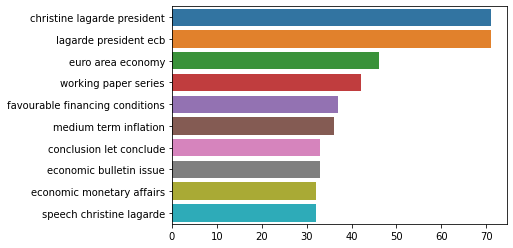

In [ ]:
"""
tri-gram of a particular speaker at all of speeches
without stop words

"""
speaker_name = 'Christine Lagarde'
plot_top_ngrams_barchart(df_nosent[df_nosent['speakers']==speaker_name]['contents'],3, stop)

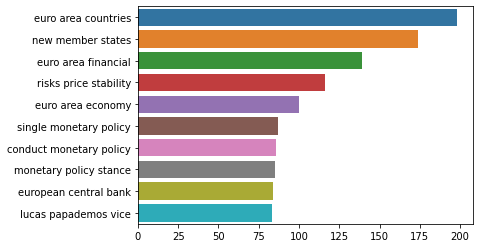

In [ ]:
speaker_name = 'Lucas Papademos'
plot_top_ngrams_barchart(df_nosent[df_nosent['speakers']==speaker_name]['contents'],3, stop)

## Topic Modelling

But before getting into topic modeling we have to pre-process our data a little. We will:

* tokenize: the process by which sentences are converted to a list of tokens or words.
* remove stopwords
* lemmatize: reduces the inflectional forms of each word into a common base or root.
* convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.





In [ ]:
def get_lda_objects(text, num_topics):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = num_topics, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

### On Entire Speeches

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df_nosent[df_nosent['lang']=='en']['contents'], 10)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.show_topics()

[(0,
  '0.029*"market" + 0.023*"financial" + 0.013*"euro" + 0.011*"area" + 0.010*"The" + 0.010*"bank" + 0.008*"integration" + 0.007*"risk" + 0.006*"liquidity" + 0.005*"system"'),
 (1,
  '0.016*"policy" + 0.014*"rate" + 0.013*"inflation" + 0.011*"The" + 0.010*"area" + 0.009*"monetary" + 0.009*"euro" + 0.007*"ECB" + 0.006*"growth" + 0.006*"economy"'),
 (2,
  '0.016*"financial" + 0.014*"crisis" + 0.014*"The" + 0.010*"market" + 0.009*"policy" + 0.007*"ECB" + 0.006*"area" + 0.006*"risk" + 0.006*"euro" + 0.006*"measure"'),
 (3,
  '0.024*"payment" + 0.012*"The" + 0.011*"euro" + 0.009*"bank" + 0.008*"European" + 0.008*"service" + 0.008*"SEPA" + 0.008*"market" + 0.006*"would" + 0.006*"digital"'),
 (4,
  '0.016*"euro" + 0.013*"area" + 0.011*"country" + 0.011*"The" + 0.011*"policy" + 0.007*"European" + 0.007*"economic" + 0.007*"market" + 0.006*"financial" + 0.006*"monetary"'),
 (5,
  '0.021*"policy" + 0.018*"monetary" + 0.015*"price" + 0.014*"bank" + 0.012*"central" + 0.010*"The" + 0.009*"financi

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.004146 -0.000059       1        1  19.058540
1     -0.099699  0.029390       2        1  15.869751
9     -0.032981  0.001582       3        1  15.036770
8      0.019161 -0.049337       4        1  12.823553
0     -0.018617 -0.063715       5        1  11.107090
5     -0.097308  0.010543       6        1   9.108872
2     -0.017950 -0.019418       7        1   7.075692
3      0.106313 -0.060816       8        1   5.993467
7      0.082538  0.018444       9        1   2.209516
6      0.062690  0.133386      10        1   1.716749, topic_info=           Term          Freq         Total Category  logprob  loglift
1526    payment   7330.000000   7330.000000  Default  30.0000  30.0000
297   financial  38085.000000  38085.000000  Default  29.0000  29.0000
56     European  20742.000000  20742.000000  Default  28.0000  28.0000
380      market  37310.000000  37310.000000  Default  27.0000  27.0000
392    monetary  32117.000000  32117.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
187        bank    206.573118  34585.467891  Topic10  -5.8665  -1.0558
297   financial    200.715676  38085.946320  Topic10  -5.8952  -1.1810
173        area    176.363019  35920.654346  Topic10  -6.0246  -1.2518
398        need    162.613818  11251.155061  Topic10  -6.1058  -0.1721
1104    country    159.315013  18953.667602  Topic10  -6.1262  -0.7141

[957 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
60062      7  0.779867  'belief
60068      7  0.931426   'faith
59224      1  0.913418      're
59224      3  0.043496      're
58546      1  0.922964      've
...      ...       ...      ...
8972       4  0.030478     être
8972       7  0.015239     être
8972       9  0.868620     être
8972      10  0.015239     être
60864      9  0.966303      ï¿½

[4067 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 10, 9, 1, 6, 3, 4, 8, 7])

### On Particular Speech

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df_sent110[df_sent110['Speech ID']== speech_id]['en_SentenceText'], 5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(

In [ ]:
lda_model.show_topics()

[(0,
  '0.015*"This" + 0.010*"ECB" + 0.010*"especially" + 0.010*"economic" + 0.010*"recently" + 0.010*"Enria" + 0.010*"policy" + 0.010*"Lagarde" + 0.005*"since" + 0.005*"outlook"'),
 (1,
  '0.024*"bank" + 0.021*"policy" + 0.016*"monetary" + 0.013*"macroeconomic" + 0.013*"tide" + 0.011*"need" + 0.011*"rate" + 0.011*"use" + 0.011*"risk" + 0.011*"crisis"'),
 (2,
  '0.021*"bank" + 0.017*"interest" + 0.015*"policy" + 0.014*"rate" + 0.012*"The" + 0.012*"monetary" + 0.012*"guard" + 0.011*"speak" + 0.011*"first" + 0.010*"area"'),
 (3,
  '0.014*"risk" + 0.012*"environment" + 0.011*"assessing" + 0.011*"climate" + 0.011*"bank" + 0.009*"And" + 0.009*"even" + 0.009*"macroeconomic" + 0.009*"increase" + 0.009*"environmental"'),
 (4,
  '0.025*"risk" + 0.014*"bank" + 0.014*"supervisory" + 0.014*"environmental" + 0.011*"last" + 0.011*"year" + 0.009*"Indeed" + 0.009*"would" + 0.009*"climate-related" + 0.009*"monetary"')]

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.035850 -0.001419       1        1  24.210775
3      0.112830  0.074977       2        1  22.611299
4      0.021511 -0.118563       3        1  22.174155
2     -0.108522  0.054082       4        1  20.892516
0      0.010031 -0.009077       5        1  10.111255, topic_info=            Term       Freq      Total Category  logprob  loglift
95        policy  12.000000  12.000000  Default  30.0000  30.0000
41      economic   3.000000   3.000000  Default  29.0000  29.0000
259         This   5.000000   5.000000  Default  28.0000  28.0000
377  supervisory   5.000000   5.000000  Default  27.0000  27.0000
110     interest   6.000000   6.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
152         even   0.602117   4.507341   Topic5  -5.2106   0.2785
423          set   0.602095   2.477147   Topic5  -5.2107   0.8771
265      current   0.602080   6.546096   Topic5  -5.2107  -0.0947
42          firm   0.602051   1.811724   Topic5  -5.2107   1.1898
422         mean   0.602041   1.795450   Topic5  -5.2108   1.1988

[299 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
355       2  0.763284         1.5
356       2  0.763284  2.8-degree
131       1  0.756419         200
576       4  0.776017        2002
370       3  0.407466        2020
...     ...       ...         ...
53        3  0.608615       would
26        2  0.310305        year
26        3  0.465458        year
26        4  0.155153        year
26        5  0.155153        year

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

### For Particular Speaker

In [ ]:
speaker_name = 'Lucas Papademos'


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df_nosent[df_nosent['speakers']==speaker_name]['contents'], 5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(

In [ ]:
lda_model.show_topics()

[(0,
  '0.028*"euro" + 0.019*"area" + 0.013*"growth" + 0.012*"country" + 0.010*"The" + 0.008*"economic" + 0.007*"policy" + 0.007*"market" + 0.007*"States" + 0.007*"inflation"'),
 (1,
  '0.027*"policy" + 0.017*"monetary" + 0.013*"stability" + 0.013*"financial" + 0.011*"price" + 0.009*"The" + 0.007*"central" + 0.007*"bank" + 0.007*"ECB" + 0.006*"economic"'),
 (2,
  '0.026*"financial" + 0.021*"market" + 0.014*"risk" + 0.012*"area" + 0.011*"euro" + 0.011*"The" + 0.010*"bank" + 0.009*"credit" + 0.007*"system" + 0.006*"price"'),
 (3,
  '0.016*"policy" + 0.013*"monetary" + 0.012*"price" + 0.012*"growth" + 0.010*"The" + 0.010*"inflation" + 0.008*"economic" + 0.007*"effect" + 0.007*"rate" + 0.006*"market"'),
 (4,
  '0.011*"growth" + 0.011*"education" + 0.009*"financial" + 0.008*"The" + 0.007*"capital" + 0.005*"labour" + 0.005*"also" + 0.005*"economic" + 0.004*"economy" + 0.004*"human"')]

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.071088  0.103742       1        1  33.794094
1      0.049861 -0.046211       2        1  25.830009
0      0.037371 -0.027487       3        1  20.987468
3     -0.001548 -0.056393       4        1  17.084075
4     -0.156772  0.026349       5        1   2.304354, topic_info=           Term         Freq        Total Category  logprob  loglift
390      growth  1423.000000  1423.000000  Default  30.0000  30.0000
358   financial  2691.000000  2691.000000  Default  29.0000  29.0000
594      policy  2382.000000  2382.000000  Default  28.0000  28.0000
331        euro  2313.000000  2313.000000  Default  27.0000  27.0000
534    monetary  1594.000000  1594.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
879  Eurosystem    11.048701   174.830150   Topic5  -6.0259   1.0089
331        euro    14.552771  2313.112574   Topic5  -5.7504  -1.2982
704      sector    11.951243   531.490004   Topic5  -5.9474  -0.0245
39     European    12.176795   709.959013   Topic5  -5.9287  -0.2953
594      policy    11.720036  2382.051185   Topic5  -5.9669  -1.5440

[432 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
6745       4  0.932157   16th
10621      4  0.815009   1936
7505       4  0.932137  1960s
10753      4  0.932043   1986
6750       1  0.072199   1993
...      ...       ...    ...
835        1  0.313689   year
835        2  0.175606   year
835        3  0.337704   year
835        4  0.162098   year
835        5  0.010506   year

[960 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])

## WORD CLOUDS

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk

In [ ]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

### Entire Speech

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


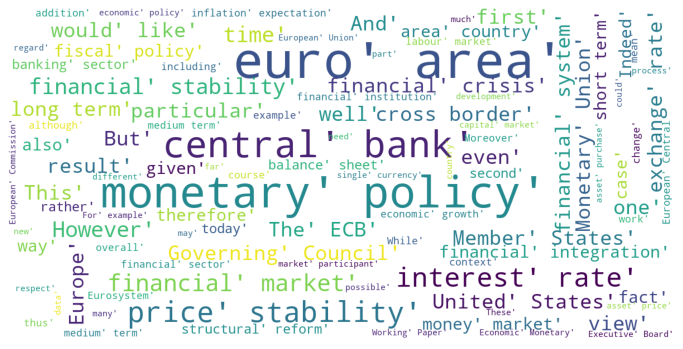

In [ ]:
plot_wordcloud(df_nosent[df_nosent['lang']=='en']['contents'])

### On a Particular Speech

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


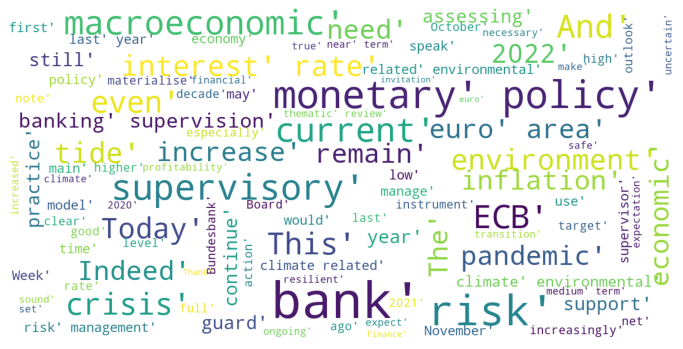

In [ ]:
plot_wordcloud(df_sent110[df_sent110['Speech ID']== speech_id]['en_SentenceText'])

### For a speaker

In [ ]:
df_nosent['speakers'].unique()

array(['Christine Lagarde', 'Fabio Panetta', 'Philip R. Lane',
       'Frank Elderson', 'Isabel Schnabel', 'Luis de Guindos', nan,
       'Yves Mersch', 'Benoît Cœuré', 'Sabine Lautenschläger',
       'Mario Draghi', 'Peter Praet', 'Vítor Constâncio', 'Jörg Asmussen',
       'José Manuel González-Páramo', 'Lorenzo Bini Smaghi',
       'Jürgen Stark', 'Jean-Claude Trichet', 'Gertrude Tumpel-Gugerell',
       'Lucas Papademos', 'Otmar Issing', 'Tommaso Padoa-Schioppa',
       'Eugenio Domingo Solans', 'Willem F. Duisenberg',
       'Sirkka Hämäläinen', 'Christian Noyer',
       'Willem F. Duisenberg,Eugenio Domingo Solans',
       'Alexandre Lamfalussy'], dtype=object)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


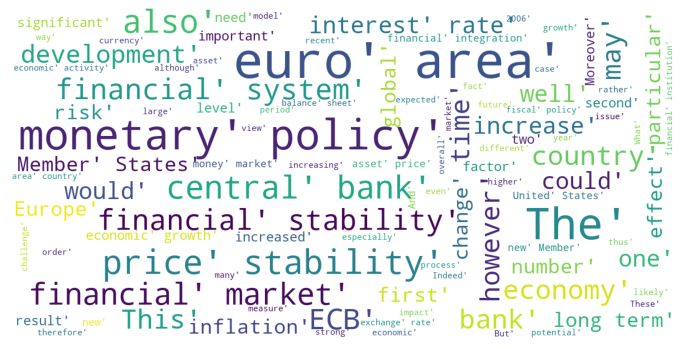

In [ ]:
speaker_name = 'Lucas Papademos'
plot_wordcloud(df_nosent[df_nosent['speakers']==speaker_name]['contents'])

In [ ]:
df_nosent[df_nosent['speakers']=='Lucas Papademos'].sample(5)

,Unnamed: 0,date,speakers,title,subtitle,contents,lang,en_subtitle,en_title,Type of speech,Type of speech 2,Role of speaker,Role of speaker 2,Occasion,Occasion 2,Occasion Place,Occasion Place 2
2110,2110,2004-11-12,Lucas Papademos,The euro after five years: assessing its perf...,"Speech by Lucas Papademos, Vice-President of t...",The euro after five years: assessing its per...,en,"Speech by Lucas Papademos, Vice-President of t...",The euro after five years: assessing its perf...,Speech,The euro: five years on - Implications for Asia”,Vice-President of the European Central Bank,Vice-President of the European Central Bank,The euro: five years on - Implications for Asia”,13th International Monetary Symposium,Tokyo,Tokyo
2179,2179,2004-04-19,Lucas Papademos,"Policy-making in EMU: strategies, rules and di...","Speech by Lucas Papademos, Vice President of t...","Policy-making in EMU: strategies, rules and ...",es,"Speech by Lucas Papademos, Vice President of t...","Policy-making in EMU: strategies, rules and di...",Speech,Speech by Lucas Papademos,Vice President of the ECB Banco de España,Vice President of the ECB Banco de España,Speech by Lucas Papademos,19 April 2004,Madrid,"Banco de España, Madrid"
1901,1901,2006-12-11,Lucas Papademos,ECB Financial Stability Review December 2006,"Opening remarks by Lucas Papademos, Vice Presi...",ECB Financial Stability Review December 2006...,en,"Opening remarks by Lucas Papademos, Vice Presi...",ECB Financial Stability Review December 2006,Financial Stability Review,Opening remarks,Vice President of the ECB,Vice President of the ECB,December 2006 ECB Financial Stability Review,the publication of the December 2006 ECB Finan...,Frankfurt am Main,Frankfurt am Main
2211,2211,2003-11-03,Lucas Papademos,Growth and stability in Europe: the role of mo...,"Speech by Lucas Papademos, Vice President of t...",Growth and stability in Europe: the role of ...,en,"Speech by Lucas Papademos, Vice President of t...",Growth and stability in Europe: the role of mo...,Speech,Speech,Vice President of the ECB,Vice President of the ECB,the 75th anniversary of the Bank of Greece,75th anniversary of the Bank of Greece,Athens,Athens
2051,2051,2005-06-16,Lucas Papademos,Opening address at the ECB Workshop “What effe...,"Lucas Papademos, Vice-President of the Europea...",Opening address at the ECB Workshop “What ef...,en,"Lucas Papademos, Vice-President of the Europea...",Opening address at the ECB Workshop “What effe...,"Lucas Papademos, Vice-President of the Europea...","Lucas Papademos, Vice-President of the Europea...",Vice-President of the European Central Bank,Vice-President of the European Central Bank,European Central Bank,Vice-President of the European Central Bank,Frankfurt am Main,Frankfurt am Main


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


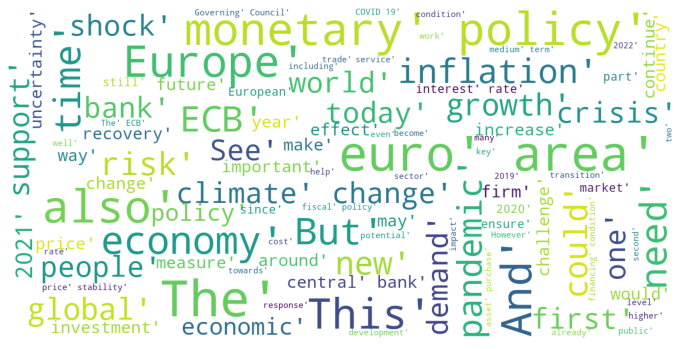

In [ ]:
speaker_name = 'Christine Lagarde'
plot_wordcloud(df_nosent[df_nosent['speakers']==speaker_name]['contents'])

"""



*   Macro Enviornment of a timepoint affects the speeches

*   Timeline based analysis e.g. topic modelling, word-clouds, trigram analysis can also be done 



In [ ]:
df_nosent[df_nosent['speakers']=='Christine Lagarde'].sample(5)

,Unnamed: 0,date,speakers,title,subtitle,contents,lang,en_subtitle,en_title,Type of speech,Type of speech 2,Role of speaker,Role of speaker 2,Occasion,Occasion 2,Occasion Place,Occasion Place 2
29,29,2022-09-26,Christine Lagarde,Hearing of the Committee on Economic and Monet...,"Speech by Christine Lagarde, President of the ...",SPEECH Hearing of the Committee on Economic...,en,"Speech by Christine Lagarde, President of the ...",Hearing of the Committee on Economic and Monet...,Speech,Speech,President of the ECB,President of the ECB,Committee on Economic and Monetary Affairs of ...,Hearing of the Committee on Economic and Monet...,Hearing,European Parliament
18,18,2022-11-04,Christine Lagarde,Monetary policy in a high inflation environmen...,"Lecture by Christine Lagarde, President of the...",SPEECH Monetary policy in a high inflation ...,en,"Lecture by Christine Lagarde, President of the...",Monetary policy in a high inflation environmen...,Lecture,Lecture,President of the ECB,President of the ECB,Lecture by Christine Lagarde,dedicated to Professor Ragnar Nurkse,Eesti Pank,Eesti Pank
318,318,2019-11-04,Christine Lagarde,Laudatory speech,"Laudatory speech by Christine Lagarde, Preside...",Laudatory speech Laudatory speech by Chris...,en,"Laudatory speech by Christine Lagarde, Preside...",Laudatory speech,speech,Laudatory speech,President of the ECB,President of the ECB,VdZ Publishers’ Night,VdZ Publishers’ Night,Berlin,Berlin
158,158,2021-06-21,Christine Lagarde,Hearing of the Committee on Economic and Monet...,"Introductory statement by Christine Lagarde, P...",SPEECH Hearing of the Committee on Economi...,en,"Introductory statement by Christine Lagarde, P...",Hearing of the Committee on Economic and Monet...,videoconference,Introductory statement by Christine Lagarde,President of the ECB,President of the ECB,Hearing of the Committee on Economic and Monet...,Hearing of the Committee on Economic and Monet...,by videoconference,Committee on Economic and Monetary Affairs of ...
215,215,2020-11-11,Christine Lagarde,Monetary policy in a pandemic emergency,"Keynote speech by Christine Lagarde, President...",SPEECH Monetary policy in a pandemic emerg...,en,"Keynote speech by Christine Lagarde, President...",Monetary policy in a pandemic emergency,Keynote speech,Keynote speech,President of the ECB,President of the ECB,ECB Forum on Central Banking,ECB Forum on Central Banking,ECB,ECB Forum on Central Banking


## Financial Sentiment Analysis

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer, device=0)

sentences = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results = nlp(sentences, **tokenizer_kwargs)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [ ]:
"""
Can be used to generate the speech level
sentiment score for the dataset

"""

In [ ]:
speeches = df_nosent['contents'].tolist()

In [ ]:
speech_scores = nlp(speeches, **tokenizer_kwargs)

In [ ]:
speech_scores

[{'label': 'Positive', 'score': 0.6136675477027893},
 {'label': 'Negative', 'score': 0.538543164730072},
 {'label': 'Neutral', 'score': 0.9891022443771362},
 {'label': 'Neutral', 'score': 0.999871015548706},
 {'label': 'Neutral', 'score': 0.9891022443771362},
 {'label': 'Neutral', 'score': 0.9891022443771362},
 {'label': 'Negative', 'score': 0.6608273386955261},
 {'label': 'Neutral', 'score': 0.5936925411224365},
 {'label': 'Neutral', 'score': 0.6737543940544128},
 {'label': 'Neutral', 'score': 0.9997492432594299},
 {'label': 'Neutral', 'score': 0.9998538494110107},
 {'label': 'Positive', 'score': 0.40141236782073975},
 {'label': 'Neutral', 'score': 0.9991891980171204},
 {'label': 'Neutral', 'score': 0.9891022443771362},
 {'label': 'Neutral', 'score': 0.9481163024902344},
 {'label': 'Neutral', 'score': 0.9891022443771362},
 {'label': 'Neutral', 'score': 0.9999734163284302},
 {'label': 'Neutral', 'score': 0.5000806450843811},
 {'label': 'Neutral', 'score': 0.9985817670822144},
 {'label'

In [ ]:
df_speech_scores = pd.DataFrame.from_dict(speech_scores)

In [ ]:
df_speech_scores.head()

,label,score
0,Positive,0.613668
1,Negative,0.538543
2,Neutral,0.989102
3,Neutral,0.999871
4,Neutral,0.989102


In [ ]:
assert len(df_nosent) == len(df_speech_scores)

In [ ]:
df_nosent['speech_label_finbert'] = df_speech_scores['label']

In [ ]:
df_nosent['speech_score_finbert'] = df_speech_scores['score']

<BarContainer object of 3 artists>

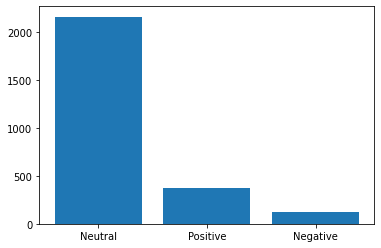

In [ ]:
plt.bar(df_nosent['speech_label_finbert'].value_counts().index,
        df_nosent['speech_label_finbert'].value_counts())

But here above model is taking just first 512 tokens from the speech to assign a label which is not correct !

In [ ]:
df_sent110.columns

Index(['Speech ID', 'date', 'speakers', 'title', 'subtitle', 'lang',
       'en_subtitle', 'en_title', 'Type of speech', 'Type of speech 2',
       'Role of speaker', 'Role of speaker 2', 'Occasion', 'Occasion 2',
       'Occasion Place', 'Occasion Place 2', 'SentenceText', 'en_SentenceText',
       'SentenceID'],
      dtype='object')

In [ ]:
"""
Can be used to generate the sentence level 
sentiment score for the dataset

"""
sentences = df_sent110['en_SentenceText'].tolist()

In [ ]:
print(type(sentences))

<class 'list'>


In [ ]:
sent_scores = nlp(sentences)

In [ ]:
df_sent_scores = pd.DataFrame.from_dict(sent_scores)
assert len(df_sent_scores) == len(df_sent110)
df_sent110['sent_label_finbert'] = df_sent_scores['label']

<BarContainer object of 3 artists>

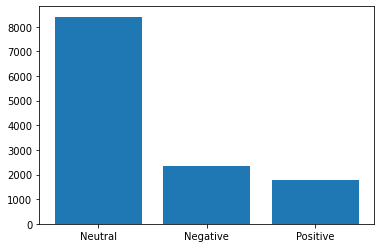

In [ ]:
plt.bar(df_sent110['sent_label_finbert'].value_counts().index,
        df_sent110['sent_label_finbert'].value_counts())

In [ ]:
"""
let's create speech-id wise labels based on argmax of positive and negative
"""
ids = list(df_sent110['Speech ID'].unique())
df_sent110['Pos_Counts']=''
df_sent110['Neg_Counts']=''
for speech_id in ids:
  pos=0
  neg=0
  label_countsdic = df_sent110[df_sent110['Speech ID']==speech_id]['sent_label_finbert'].value_counts()
  if 'Positive' in label_countsdic.keys():
    pos = label_countsdic['Positive']
  if 'Negative' in label_countsdic.keys():
    neg = label_countsdic['Negative']
  ixlist = list(df_sent110[df_sent110['Speech ID']==speech_id].index)
  df_sent110.loc[ixlist,'Pos_Counts'] = pos
  df_sent110.loc[ixlist,'Neg_Counts'] = neg

In [ ]:
df_sent110[df_sent110['Speech ID']==speech_id].index

Int64Index([12494, 12495, 12496, 12497, 12498, 12499, 12500, 12501, 12502,
            12503, 12504],
           dtype='int64')

In [ ]:
df_sent110.head(5)

,Speech ID,date,speakers,title,subtitle,lang,en_subtitle,en_title,Type of speech,Type of speech 2,...,Occasion,Occasion 2,Occasion Place,Occasion Place 2,SentenceText,en_SentenceText,SentenceID,sent_label_finbert,Pos_Counts,Neg_Counts
0,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",SPEECH Macroprudential policy in Europe: bu...,SPEECH Macroprudential policy in Europe: buil...,0,Neutral,15,16
1,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",[1] When future historians look back on our t...,[1] When future historians look back on our t...,1,Neutral,15,16
2,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...","An array of powerful shocks – the pandemic, R...","An array of powerful shocks – the pandemic, R...",2,Negative,15,16
3,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",This unstable environment poses sizeable risks...,This unstable environment poses sizeable risks...,3,Negative,15,16
4,0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",en,"Welcome remarks by Christine Lagarde, Presiden...",Macroprudential policy in Europe: building res...,Welcome remarks,Welcome remarks,...,sixth annual conference of the ESRB,sixth annual conference of the ESRB,European Systemic Risk Board,"European Systemic Risk Board, at the sixth ann...",And those risks are further heightened by a we...,And those risks are further heightened by a we...,4,Negative,15,16


In [ ]:
"""
speech wise sentiment analysis
"""
print('No of Postive Sent')
print(df_sent110[df_sent110['Speech ID']== speech_id]['Pos_Counts'].mean())
print('No of Negative Sent')
print(df_sent110[df_sent110['Speech ID']== speech_id]['Neg_Counts'].mean())

No of Postive Sent
1.0
No of Negative Sent
4.0


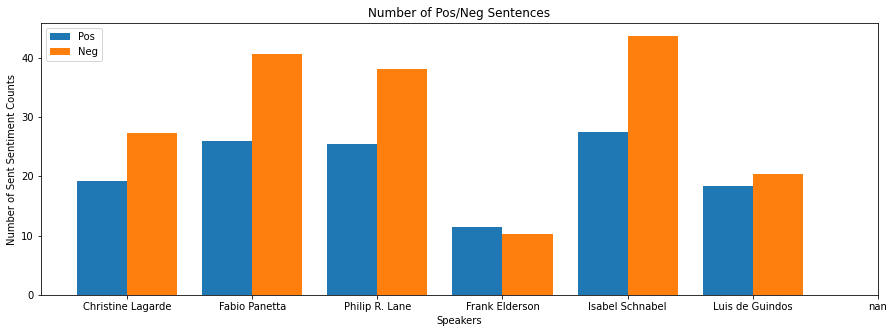

In [ ]:
"""
speaker wise sentiment analysis
"""
# plotting graph
speakers = list(df_sent110['speakers'].unique())
pos=[]
neg = []
for speaker in speakers:
  pos.append(df_sent110[df_sent110['speakers']==speaker]['Pos_Counts'].mean())
  neg.append(df_sent110[df_sent110['speakers']==speaker]['Neg_Counts'].mean())

X = speakers
Y = pos
Z= neg
  
X_axis = np.arange(len(X))
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Pos')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Neg')

plt.xticks(X_axis, X)
plt.xlabel("Speakers")
plt.ylabel("Number of Sent Sentiment Counts")
plt.title("Number of Pos/Neg Sentences")
plt.legend()
plt.show()

## Text Complexity Analysis

It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

There are many readability score formulas available for the English language. Some of the most prominent ones are:



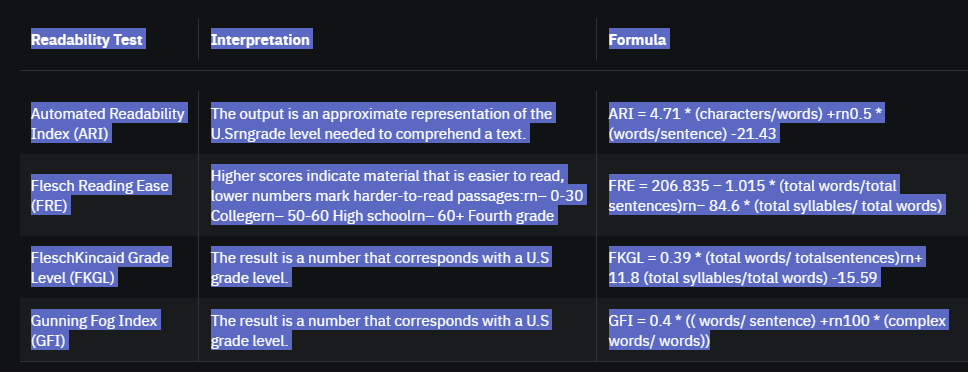

In [ ]:
from textstat import flesch_reading_ease

df_nosent['flesch_reading_score'] = df_nosent['contents'].apply(lambda x : flesch_reading_ease(x))

In [ ]:
"""
readability score for a speech

"""
df_nosent.loc[speech_id,'flesch_reading_score']

52.6

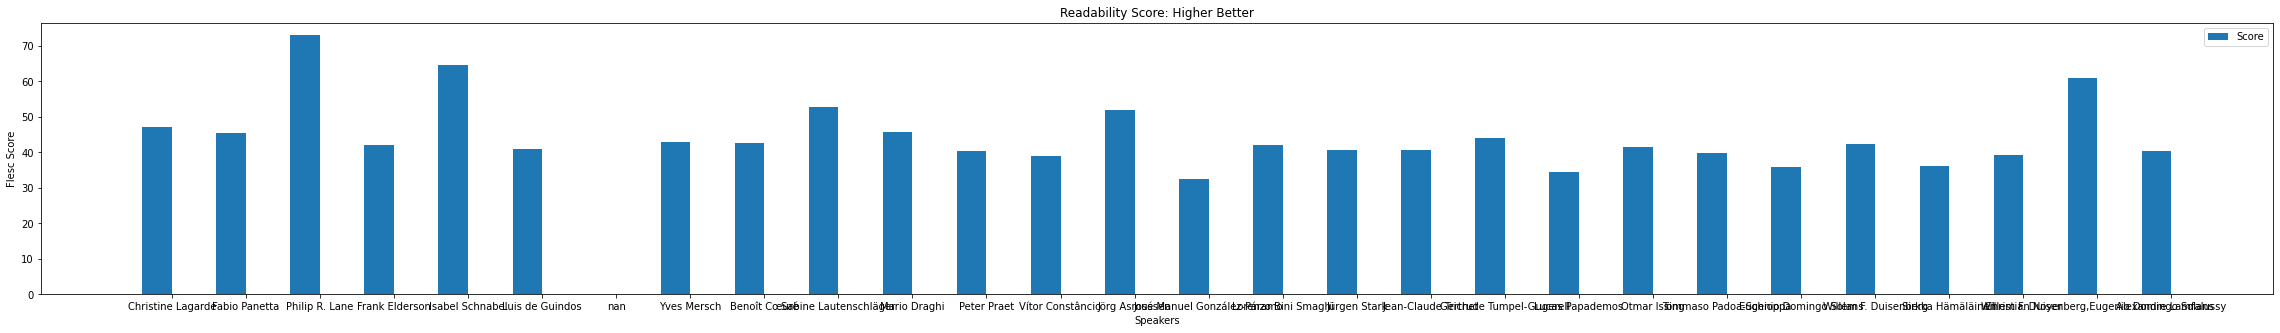

In [ ]:
"""
speaker wise text complexity analysis
"""
# plotting graph
speakers = list(df_nosent['speakers'].unique())
pos=[]

for speaker in speakers:
  pos.append(df_nosent[df_nosent['speakers']==speaker]['flesch_reading_score'].mean())
  

X = speakers
Y = pos
# Z= neg
  
X_axis = np.arange(len(X))
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(5)
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Score')
# plt.bar(X_axis + 0.2, Z, 0.4, label = 'Neg')

plt.xticks(X_axis, X)
plt.xlabel("Speakers")
plt.ylabel("Flesc Score")
plt.title("Readability Score: Higher Better")
plt.legend()
plt.show()

In [ ]:
"""
Ref:
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
""""

# Speech Summarization

In [ ]:
import torch
from transformers import pipeline

hf_name = 'pszemraj/led-large-book-summary'

summarizer = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)


In [ ]:
"""
speech wise summary can be generated 
"""
speech_id = 10

In [ ]:
wall_of_text = df_nosent.loc[speech_id,'contents']

result = summarizer(
    wall_of_text,
    min_length=16,
    max_length=1024,
    no_repeat_ngram_size=3,
    encoder_no_repeat_ngram_size=3,
    repetition_penalty=3.5,
    num_beams=4,
    early_stopping=True,
)


In [ ]:
result

[{'summary_text': 'Frank Elderson delivers a keynote address at the dinner for the twenty-fifth edition of EURFINANCE WEEKEND. The theme of his speech is "Maintaining prudent prudence" and addresses the importance of managing risk while navigating "ongoing currents". He references the previous year\'s outlook when he delivered similar remarks at the same event, but now the outlook has changed due to Russia\'s aggression against Ukraine. He notes that whereas a year ago he had predicted that inflation would eventually come back to the ECB\'s 2% goal, now it seems more likely that it will persist well into the next decade. Frank also speaks about the role of prudence in financial stability and how banks have to respond to the shifts in the market as well as the shifting dynamics within the organization itself. In particular, he focuses on how banks are impacted by the political and economic tides and how they can better compete with one another.'}]